# LAB 1 : Realisation of Logic Gates and Linear Regression Equation

Name : Hrishikesh Pable

Roll Number : 200010037

Referrence Material : Page no. 26-29, Artificial Neural Network by B. Yegnanarayana




#**Problem 1** : Demonstrate the realization of NAND gate, NOR gate, and XOR gate using McCulloch Pitts (MP) and Rosenblatt’s Perceptron model.

  1. Write down the truth table of the logic gates.
  2. For MP model: compute the appropriate weight, such that the neuron provide logic
  gate output.
  3. For Perceptron: use truth table values as input and output to learn the weights
  through weight update equation.

## Write down the Objectives, Hypothesis and Experimental description for the above problem



1. The objective of this experiment is to demonstrate the realization of NAND gate, NOR gate, and XOR gate using McCulloch Pitts (MP) and Rosenblatt’s Perceptron model.

2. The hypothesis of this experiment is that the MP model and Rosenblatt’s Perceptron model can be used to realize the NAND gate, NOR gate, and XOR gate.

3. The experimental description of this experiment is as follows:

    1. The truth table of the logic gates is written down.
    2. For MP model: the appropriate weight is initialized, such that the neuron provides logic gate output.
    3. For Perceptron: the truth table values are used as input and output to learn the weights through weight update equation.

## Programming : 
  Please write a program to demonstrate the same

In [49]:
## Part A : MP model

import numpy as np
import matplotlib.pyplot as plt


def mp_model(x,gate):
 
  ## Write the activation function and define weights and bias for all three gates
  
  if gate == "NAND":

    ## Write your code here
    weights = [-1, -1]
    threshold = -1
    
    lin_comb = np.array(weights) @ np.array(x) - np.array(threshold)
    if lin_comb >= 0:
        out = 1
    else:
        out = 0


  if gate == "NOR":

    ## Write your code here
    weights = [-1, -1]
    threshold = 0
    
    lin_comb = np.array(weights) @ np.array(x) - np.array(threshold)
    if lin_comb >= 0:
        out = 1
    else:
        out = 0
  
  if gate == "XOR":

    threshold1 = 0
    weight1 = [-1,-1]
    if np.array(weight1) @ np.array(x) >= threshold1:
      out1 = 1
    else:
      out1 = 0
    
    threshold2 = -1
    weight2 = [-1,-1]
    if weight2 @ np.array(x) >= threshold2:
      out2 = 0
    else:
      out2 = 1

    threshold3 = 0
    temp = np.array([out1,out2])
    weight3 = np.array([-1,-1])
    if weight3 @ temp >= threshold3:
      out = 1
    else:
      out = 0

  
  return out


inp_list = [(0,0), (0,1), (1,0), (1,1)] ## Create a list consisting of inputs to logic gates (Binary, i.e (0,0),(0,1),(1,0),(1,1))
req_gates = ["NAND", "NOR", "XOR"] ## Create a list of all gates (NAND,NOR,XOR)

for gate in req_gates:
  print('Results for ' + gate + ' gate : ')
  for inp in inp_list:
    print("Input is : " + str(inp))
    out = mp_model(inp,gate)
    print("Logic Gate output is : ",out)
  
  print('=====================================')

Results for NAND gate : 
Input is : (0, 0)
Logic Gate output is :  1
Input is : (0, 1)
Logic Gate output is :  1
Input is : (1, 0)
Logic Gate output is :  1
Input is : (1, 1)
Logic Gate output is :  0
Results for NOR gate : 
Input is : (0, 0)
Logic Gate output is :  1
Input is : (0, 1)
Logic Gate output is :  0
Input is : (1, 0)
Logic Gate output is :  0
Input is : (1, 1)
Logic Gate output is :  0
Results for XOR gate : 
Input is : (0, 0)
Logic Gate output is :  0
Input is : (0, 1)
Logic Gate output is :  1
Input is : (1, 0)
Logic Gate output is :  1
Input is : (1, 1)
Logic Gate output is :  0


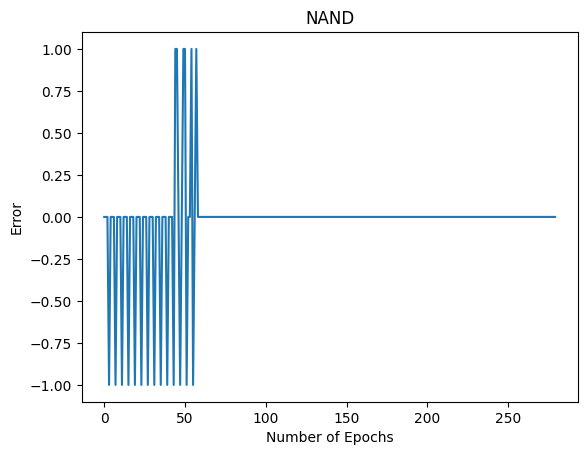

Final weights for NAND gate are :  [ 0.02 -0.02 -0.01]


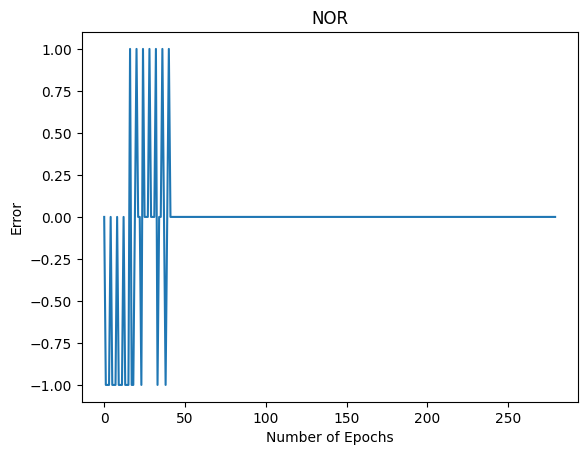

Final weights for NOR gate are :  [ 1.04083409e-17 -1.00000000e-02 -1.00000000e-02]


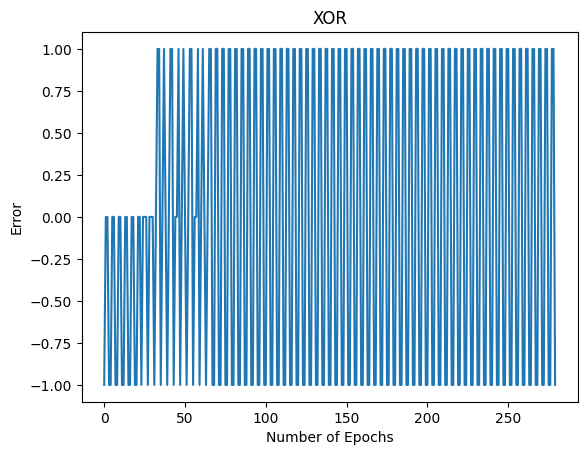

Final weights for XOR gate are :  [ 1.04083409e-17 -1.00000000e-02  1.04083409e-17]


In [21]:
## Part B : Rosenblatt's Perceptron

import numpy as np
import matplotlib.pyplot as plt

def rosenblatt_perceptron(inp_list,output,learning_rate,w_initial,num_epochs,gate):

  err_list = []

  weights = w_initial
  
  for epoch in range(num_epochs):
    
    for idx, x in enumerate(inp_list):
        
        x = np.array(x).flatten()
        lin_comb = weights @ x
        
        
        if(lin_comb > 0):
            pred = 1
        
        else:
            pred = 0
        
        curr_error = output[idx] - pred
        err_list.append(curr_error)
        w_new = weights + learning_rate * curr_error * x
        
        weights = w_new
        
    
    ## Write the learning code here, return new weights and error, Save the error value after each iteration to plot a error v/s iteration graph in case of all 3 gates

  return weights,err_list

inp_list = [[1,0,0], [1,0,1], [1,1,0], [1,1,1]] ## Create a list consisting of inputs to logic gates (Binary, i.e (0,0),(0,1),(1,0),(1,1))
nand_output = [1, 1, 1, 0] ## Define NAND gate target output
nor_output = [1, 0, 0, 0] ## Define NOR gate target output
xor_output = [0, 1, 1, 0] ## Define XOR gate target output

learning_rate = 0.01 ## Define a learning rate
w_initial = [0.1, 0.1, 0.1] ## Initialise weights
num_epochs = 300 ## Set number of epochs

## For NAND gate
w_new,error = rosenblatt_perceptron(inp_list,nand_output,learning_rate,w_initial,num_epochs,"NAND")
plt.plot(error)
plt.xlabel('Number of Epochs')
plt.ylabel('Error')
plt.title("NAND")
plt.show()
print("Final weights for NAND gate are : ",w_new)


## For NOR gate
w_new,error = rosenblatt_perceptron(inp_list,nor_output,learning_rate,w_initial,num_epochs,"NOR")
# Draw a new plot (dont overlap with previous one)



plt.plot(error)
plt.xlabel('Number of Epochs')
plt.ylabel('Error')
plt.title("NOR")
plt.show()
print("Final weights for NOR gate are : ",w_new)

## For XOR gate
w_new,error = rosenblatt_perceptron(inp_list,xor_output,learning_rate,w_initial,num_epochs,"XOR")

plt.plot(error)
plt.xlabel('Number of Epochs')
plt.ylabel('Error')
plt.title("XOR")
plt.show()
print("Final weights for XOR gate are : ",w_new)


## Inferences and Conclusion : State all the key observations and conclusion

1. Perceptron can be trained to learn weights to implement some logic gates like NAND and NOR.

2. After few epochs, the weights converge to the values which implement the logic gate, at which point the error reduces to zero.

3. Since XOR is not linearly separable, the perceptron cannot learn the weights to implement XOR.

4. The weights learned by the perceptron may not be unique. The gradient descent algorithm converges to the nearest local minima.


# **Problem 2** : Demonstrate the realization of y = 1 + 2x1 + 2x2 using Widrow’s Adaline model.

  1. Generate some N no. of data points using equation y = 1 + 2x1 + 2x2.
  2. Use the input and output data to train the Adaline model, after training the Adaline
  model should provide appropriate y as output value for any arbitrary input.

## Write down the Objectives, Hypothesis and Experimental description for the above problem

1. The objective is to train the Adaline model weights to learn the linear regression equation.

2. The hypothesis is that since Adaline model is a linear model, it can learn the linear regression equation.

3. Experimental description: 100 data points are generated using the linear regression equation. The Adaline model is trained using these data points using gradient descent algorithm. The Mean Squared Error is plotted against the number of epochs. The weights learned by the Adaline model are used to predict the output for some arbitrary input.


## Programming : 
  Please write a program to demonstrate the same

(3, 100)


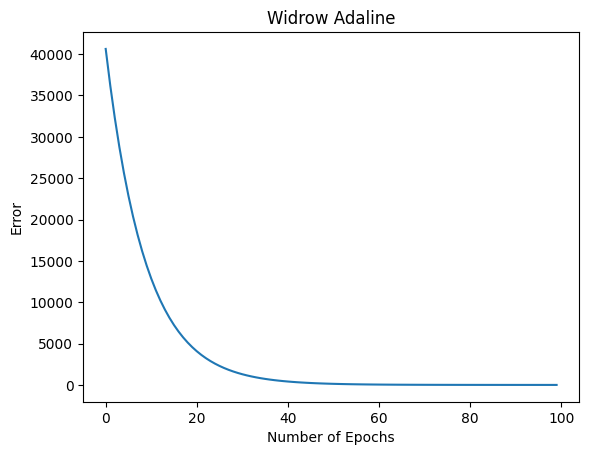

Final weights for Widrow Adaline are :  [0.13330416 2.0352962  1.96446261]


In [42]:
## Widrow Adaline model : Perform the experiment for different weight inialisations and learning rates and state your observations

def widrow_adaline(inp, y_true, learning_rate, w_initial, num_epochs, N):

  error = []
  
  weights = w_initial

  for epoch in range(num_epochs):
    ## Write the learning(training) loop here and return the new weights, also save the error after each iteration
    lin_comb = weights @ inp
    curr_error = y_true - lin_comb
    error.append(np.sum(curr_error ** 2)/len(curr_error))
    w_new = weights + learning_rate *(inp @ curr_error)
    weights = w_new
    

  return w_new,error  


N = 100 ## Set the number of input points 
learning_rate = 0.0000001 ## Define a learning rate
w_initial = [0.1, 0.1, 0.1] ## Initialise weights
num_epochs = 100 ## Set number of epochs

## Generate the input below 


x0 = np.ones(100)
x1 = np.random.choice(range(100), 100)
x2 = np.random.choice(range(100), 100)

inp = np.array([x0, x1, x2])

y_true = 1 + 2*x1 + 2*x2

print(inp.shape)
## An input array of the shape (3,100)

w_new, error = widrow_adaline(inp, y_true, learning_rate, w_initial, num_epochs, N)

## Plot the error v/s epochs
plt.plot(error)
plt.xlabel('Number of Epochs')
plt.ylabel('Error')
plt.title("Widrow Adaline")
plt.show()

# print the final weights
print("Final weights for Widrow Adaline are : ",w_new)


In [45]:
# Check the performance of the model by predicting the output for the following input
x0 = np.ones(5)
x1 = np.random.choice(range(5), 5)
x2 = np.random.choice(range(5), 5)

inp = np.array([x0, x1, x2])

y_true = 1 + 2*x1 + 2*x2

y_pred = w_new @ inp

print("Predicted output is : ",y_pred)
print("Actual output is : ",y_true)

error = np.sum((y_true - y_pred) ** 2)/len(y_true)
print("Error for the given input is : ",error)

Predicted output is :  [12.13258062  6.0975256   6.026692    8.20365539 10.23895159]
Actual output is :  [13  7  7  9 11]
Error for the given input is :  0.7455128605869605


## Inferences and Conclusion : State all the key observations and conclusion

1) Adaline model can be trained to learn weights to implement a linear regression equation.

2) Learning rate affects convergence. The empirically highest learning rate that works is 0.0000001. Higher learning rates cause the algorithm to diverge.